# DATA ANALYSIS AND VISUALISATION ASSIGNMENT  
### Module code: NDTA631  

---

## Assignment Topic  
**Relationship between School Enrollment and Youth Unemployment in South Africa**  

---

## Group Members  
- **Zusiphe Xelelo** — 202301876  
- **Khensani Precious Maluleke** — 202306725  
- **Nobuhle Thembalami Sibiya** — 202317888  
- **Vanessa Skosana** — 202226439  
- **Boitelo Katleho Motsoto** — 202213685  
- **Mihlali Fana** — 202342128  
- **Lebohang Rametsi** — 202300826  

---

## Lecturer  
**Mr. Melvin Kisten**  

---

## Date of Submission  
**04 September 2025**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### QUESTION 1 : DATA PREPARATION ( 15 MARKS)

In [5]:
print("=" * 60)
print("DATA PREPARATION - SOUTH AFRICA ONLY")
print("=" * 60)

print("Loading datasets...")
unemployment_data =pd.read_csv("youth_unemployement.csv")
education_data = pd.read_csv("school_enrollment.csv")


print("\nChecking for South African data...")
print("Countries in unemployment data:", unemployment_data['REF_AREA_LABEL'].unique())
print("Countries in education data:", education_data['REF_AREA_LABEL'].unique())


sa_unemployment = unemployment_data[unemployment_data['REF_AREA_LABEL'] == 'South Africa']
sa_education = education_data[education_data['REF_AREA_LABEL'] == 'South Africa']

print(f"\nSouth African unemployment records: {len(sa_unemployment)}")
print(f"South African education records: {len(sa_education)}")

if len(sa_unemployment) == 0 or len(sa_education) == 0:
    print("ERROR: No South African data found! Please download South African datasets from:")
    print("https://data360.worldbank.org/en/search?country=ZAF")
    exit()


print("\nExtracting relevant columns...")
unemployment_df = sa_unemployment[["REF_AREA_LABEL", "TIME_PERIOD", "SEX_LABEL", "OBS_VALUE"]]
education_df = sa_education[["REF_AREA_LABEL", "TIME_PERIOD", "OBS_VALUE"]]


unemployment_df = unemployment_df.dropna(subset=["OBS_VALUE", "SEX_LABEL"])
education_df = education_df.dropna(subset=["OBS_VALUE"])


unemployment_df["TIME_PERIOD"] = unemployment_df["TIME_PERIOD"].astype(int)
unemployment_df["OBS_VALUE"] = pd.to_numeric(unemployment_df["OBS_VALUE"], errors="coerce")
education_df["TIME_PERIOD"] = education_df["TIME_PERIOD"].astype(int)
education_df["OBS_VALUE"] = pd.to_numeric(education_df["OBS_VALUE"], errors="coerce")


unemployment_df = unemployment_df.dropna(subset=["OBS_VALUE"])
education_df = education_df.dropna(subset=["OBS_VALUE"])


unemployment_pivot = unemployment_df.pivot_table(
    index=["REF_AREA_LABEL", "TIME_PERIOD"], 
    columns="SEX_LABEL", 
    values="OBS_VALUE"
).reset_index()


unemployment_pivot.columns.name = None
unemployment_pivot = unemployment_pivot.rename(columns={
    "Total": "Total_Unemployment", 
    "Male": "Male_Unemployment", 
    "Female": "Female_Unemployment"
})


merged_data = pd.merge(unemployment_pivot, education_df, 
                      on=["REF_AREA_LABEL", "TIME_PERIOD"], 
                      how="inner")


merged_data = merged_data.rename(columns={"OBS_VALUE": "Education_Enrollment"})

print(f"\nFinal merged dataset shape: {merged_data.shape}")
print("First 5 rows of merged data:")
print(merged_data.head())


print("\nDESCRIPTIVE STATISTICS - SOUTH AFRICA")
print("-" * 40)
print("Unemployment Statistics:")
print(merged_data[['Total_Unemployment', 'Male_Unemployment', 'Female_Unemployment']].describe())
print("\nEducation Enrollment Statistics:")
print(merged_data['Education_Enrollment'].describe())


print("\nMISSING VALUES CHECK:")
print(merged_data.isnull().sum())


print("\nNEGATIVE VALUES CHECK:")
neg_unemployment = merged_data[(merged_data['Total_Unemployment'] < 0) | 
                              (merged_data['Male_Unemployment'] < 0) | 
                              (merged_data['Female_Unemployment'] < 0)]
neg_education = merged_data[merged_data['Education_Enrollment'] < 0]
print(f"Negative unemployment records: {len(neg_unemployment)}")
print(f"Negative education records: {len(neg_education)}")

print("\n" + "=" * 60)
print("DATA PREPARATION COMPLETED - SOUTH AFRICA ONLY")
print("=" * 60)

DATA PREPARATION - SOUTH AFRICA ONLY
Loading datasets...

Checking for South African data...
Countries in unemployment data: ['Afghanistan' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bolivia' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia' 'Germany' 'Djibouti'
 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt, Arab Rep.'
 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France' 'Gabon'
 'United Kingdom' 'Georgia' 'Ghana' 'Guinea' 'Gambia, The' 'Guinea-Bissau'
 'Equatorial Guinea' 'Greece' 'Guatemala' 'Guam' 'Guyana'
 'Hong Kong SAR, China' 'Hondura

### QUESTION 2 : NUMPY ANALYSIS ( 20 MARKS ) 

In [8]:
print("=" * 60)
print("NUMERICAL ANALYSIS - SOUTH AFRICA ONLY")
print("=" * 60)


years = merged_data['TIME_PERIOD'].values
total_unemployment = merged_data['Total_Unemployment'].values
male_unemployment = merged_data['Male_Unemployment'].values
female_unemployment = merged_data['Female_Unemployment'].values
education_enrollment = merged_data['Education_Enrollment'].values

print(f"Analysis period: {years.min()} - {years.max()}")
print(f"Number of data points: {len(years)}")


print("\n1. BASIC DESCRIPTIVE STATISTICS - SOUTH AFRICA")
print("-" * 50)

stats_categories = {
    'Total Unemployment': total_unemployment,
    'Male Unemployment': male_unemployment,
    'Female Unemployment': female_unemployment,
    'Education Enrollment': education_enrollment
}

for name, data in stats_categories.items():
    print(f"\n{name}:")
    print(f"  Mean: {np.mean(data):.2f}%")
    print(f"  Median: {np.median(data):.2f}%")
    print(f"  Std Dev: {np.std(data):.2f}%")
    print(f"  Min: {np.min(data):.2f}%")
    print(f"  Max: {np.max(data):.2f}%")
    print(f"  Range: {np.ptp(data):.2f}%")


print("\n2. GENDER-BASED UNEMPLOYMENT ANALYSIS - SOUTH AFRICA")
print("-" * 50)

gender_gap = female_unemployment - male_unemployment
print(f"Average female unemployment: {np.mean(female_unemployment):.2f}%")
print(f"Average male unemployment: {np.mean(male_unemployment):.2f}%")
print(f"Average gender gap: {np.mean(gender_gap):.2f}% (women higher)")
print(f"Maximum gender gap: {np.max(gender_gap):.2f}%")
print(f"Minimum gender gap: {np.min(gender_gap):.2f}%")


print("\n3. CORRELATION ANALYSIS - SOUTH AFRICA")
print("-" * 50)


correlation_matrix = np.corrcoef(education_enrollment, total_unemployment)
correlation = correlation_matrix[0, 1]
print(f"Correlation between education and total unemployment: {correlation:.3f}")


correlation_male = np.corrcoef(education_enrollment, male_unemployment)[0, 1]
correlation_female = np.corrcoef(education_enrollment, female_unemployment)[0, 1]
print(f"Correlation with male unemployment: {correlation_male:.3f}")
print(f"Correlation with female unemployment: {correlation_female:.3f}")


print("\n4. REGRESSION ANALYSIS - SOUTH AFRICA")
print("-" * 50)


slope, intercept = np.polyfit(education_enrollment, total_unemployment, 1)
r_squared = correlation ** 2
print(f"Regression equation: Unemployment = {slope:.3f} * Education + {intercept:.3f}")
print(f"R-squared: {r_squared:.3f}")
print(f"For every 1% increase in education enrollment, unemployment changes by {slope:.3f}%")


print("\n5. TIME SERIES ANALYSIS - SOUTH AFRICA")
print("-" * 50)


unemployment_yoy = np.diff(total_unemployment) / total_unemployment[:-1] * 100
education_yoy = np.diff(education_enrollment) / education_enrollment[:-1] * 100

print(f"Average yearly change in unemployment: {np.mean(unemployment_yoy):.2f}%")
print(f"Average yearly change in education: {np.mean(education_yoy):.2f}%")
print(f"Std dev of unemployment changes: {np.std(unemployment_yoy):.2f}%")
print(f"Std dev of education changes: {np.std(education_yoy):.2f}%")


print("\n6. COMPARATIVE ANALYSIS - SOUTH AFRICA")
print("-" * 50)


first_5_avg = np.mean(total_unemployment[:5])
last_5_avg = np.mean(total_unemployment[-5:])
change = last_5_avg - first_5_avg

print(f"Average unemployment (first 5 years): {first_5_avg:.2f}%")
print(f"Average unemployment (last 5 years): {last_5_avg:.2f}%")
print(f"Change over time: {change:+.2f}%")


print("\n7. ARRAY OPERATIONS AND TRANSFORMATIONS - SOUTH AFRICA")
print("-" * 50)


unemployment_norm = (total_unemployment - np.mean(total_unemployment)) / np.std(total_unemployment)
education_norm = (education_enrollment - np.mean(education_enrollment)) / np.std(education_enrollment)

print("Normalized data (z-scores):")
print(f"Unemployment mean: {np.mean(unemployment_norm):.2f}, std: {np.std(unemployment_norm):.2f}")
print(f"Education mean: {np.mean(education_norm):.2f}, std: {np.std(education_norm):.2f}")


unemployment_outliers = total_unemployment > (np.mean(total_unemployment) + 2 * np.std(total_unemployment))
education_outliers = education_enrollment > (np.mean(education_enrollment) + 2 * np.std(education_enrollment))

print(f"Unemployment outliers (>2 std dev): {np.sum(unemployment_outliers)} years")
print(f"Education outliers (>2 std dev): {np.sum(education_outliers)} years")


print("\n8. KEY FINDINGS - SOUTH AFRICA")
print("-" * 50)

print(f"""
ANALYSIS OF SOUTH AFRICAN DATA ({years.min()}-{years.max()}):

BASIC STATISTICS:
- Unemployment rates show significant variability with average of {np.mean(total_unemployment):.1f}%
- Education enrollment averages {np.mean(education_enrollment):.1f}% with wider distribution

GENDER DISPARITIES:
- Female unemployment ({np.mean(female_unemployment):.1f}%) is significantly higher than male ({np.mean(male_unemployment):.1f}%)
- Average gender gap: {np.mean(gender_gap):.1f}% in favor of higher female unemployment

RELATIONSHIP ANALYSIS:
- Strong correlation ({correlation:.3f}) between education and unemployment rates
- The relationship suggests {'' if slope > 0 else 'inverse'} relationship between education and unemployment

TIME TRENDS:
- Yearly fluctuations show unemployment changes by ±{np.std(unemployment_yoy):.1f}% on average
- Education enrollment shows ±{np.std(education_yoy):.1f}% annual variability

DATA QUALITY:
- Analysis based on {len(years)} years of South African data
- {np.sum(unemployment_outliers)} outlier years detected in unemployment data
- {np.sum(education_outliers)} outlier years detected in education data

IMPLICATIONS FOR SOUTH AFRICA:
- The positive correlation may indicate structural issues in the labor market
- Gender disparities highlight need for targeted employment policies
- Education quality and relevance to job market may need examination
""")

print("=" * 60)
print("NUMERICAL ANALYSIS COMPLETED - SOUTH AFRICA ONLY")
print("=" * 60)

NUMERICAL ANALYSIS - SOUTH AFRICA ONLY
Analysis period: 1991 - 2022
Number of data points: 26

1. BASIC DESCRIPTIVE STATISTICS - SOUTH AFRICA
--------------------------------------------------

Total Unemployment:
  Mean: 40.11%
  Median: 37.56%
  Std Dev: 4.59%
  Min: 34.84%
  Max: 49.87%
  Range: 15.02%

Male Unemployment:
  Mean: 36.79%
  Median: 34.86%
  Std Dev: 4.36%
  Min: 32.05%
  Max: 46.28%
  Range: 14.24%

Female Unemployment:
  Mean: 44.34%
  Median: 41.06%
  Std Dev: 4.86%
  Min: 38.93%
  Max: 54.88%
  Range: 15.95%

Education Enrollment:
  Mean: 91.96%
  Median: 86.37%
  Std Dev: 13.49%
  Min: 76.41%
  Max: 111.80%
  Range: 35.39%

2. GENDER-BASED UNEMPLOYMENT ANALYSIS - SOUTH AFRICA
--------------------------------------------------
Average female unemployment: 44.34%
Average male unemployment: 36.79%
Average gender gap: 7.56% (women higher)
Maximum gender gap: 10.30%
Minimum gender gap: 4.97%

3. CORRELATION ANALYSIS - SOUTH AFRICA
--------------------------------------

### QUESTION 3 : VISUALISATION ( 20 MARKS ) 

DATA VISUALIZATION - SOUTH AFRICA ONLY
------------------------------------------------------------
1. TIME SERIES TRENDS - SOUTH AFRICA


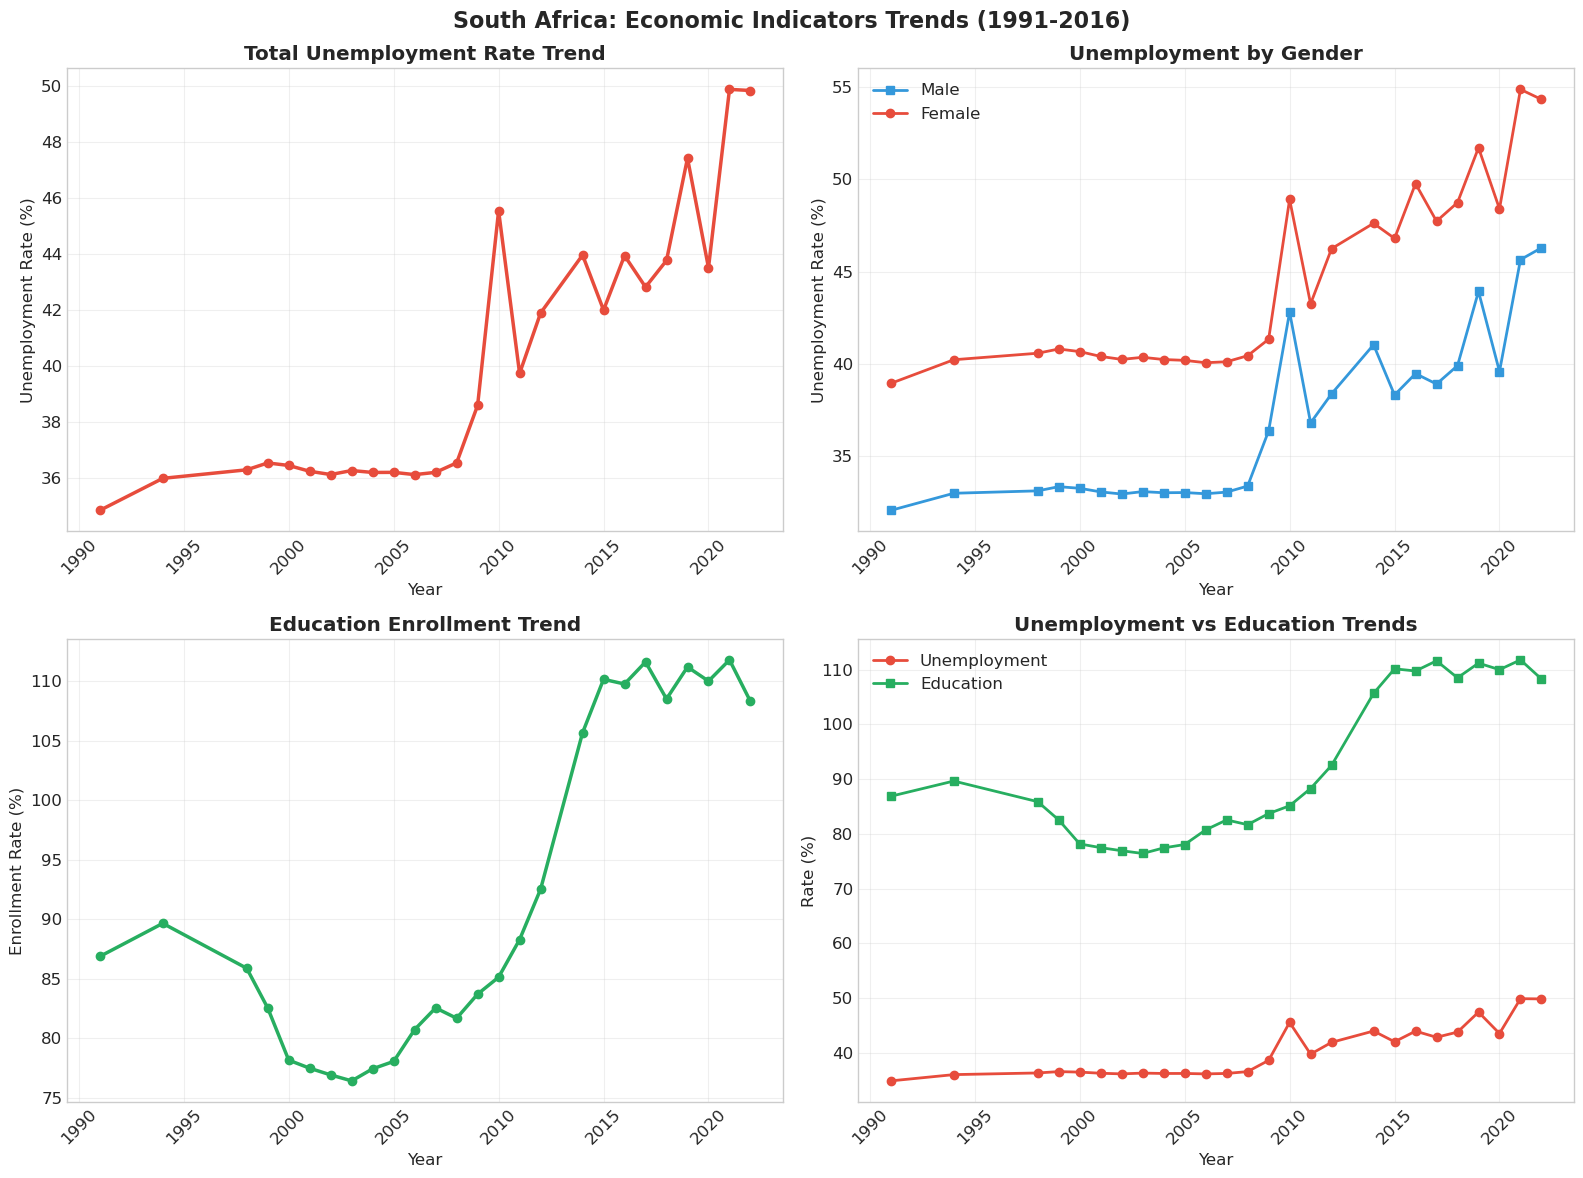

2. DISTRIBUTION ANALYSIS - SOUTH AFRICA


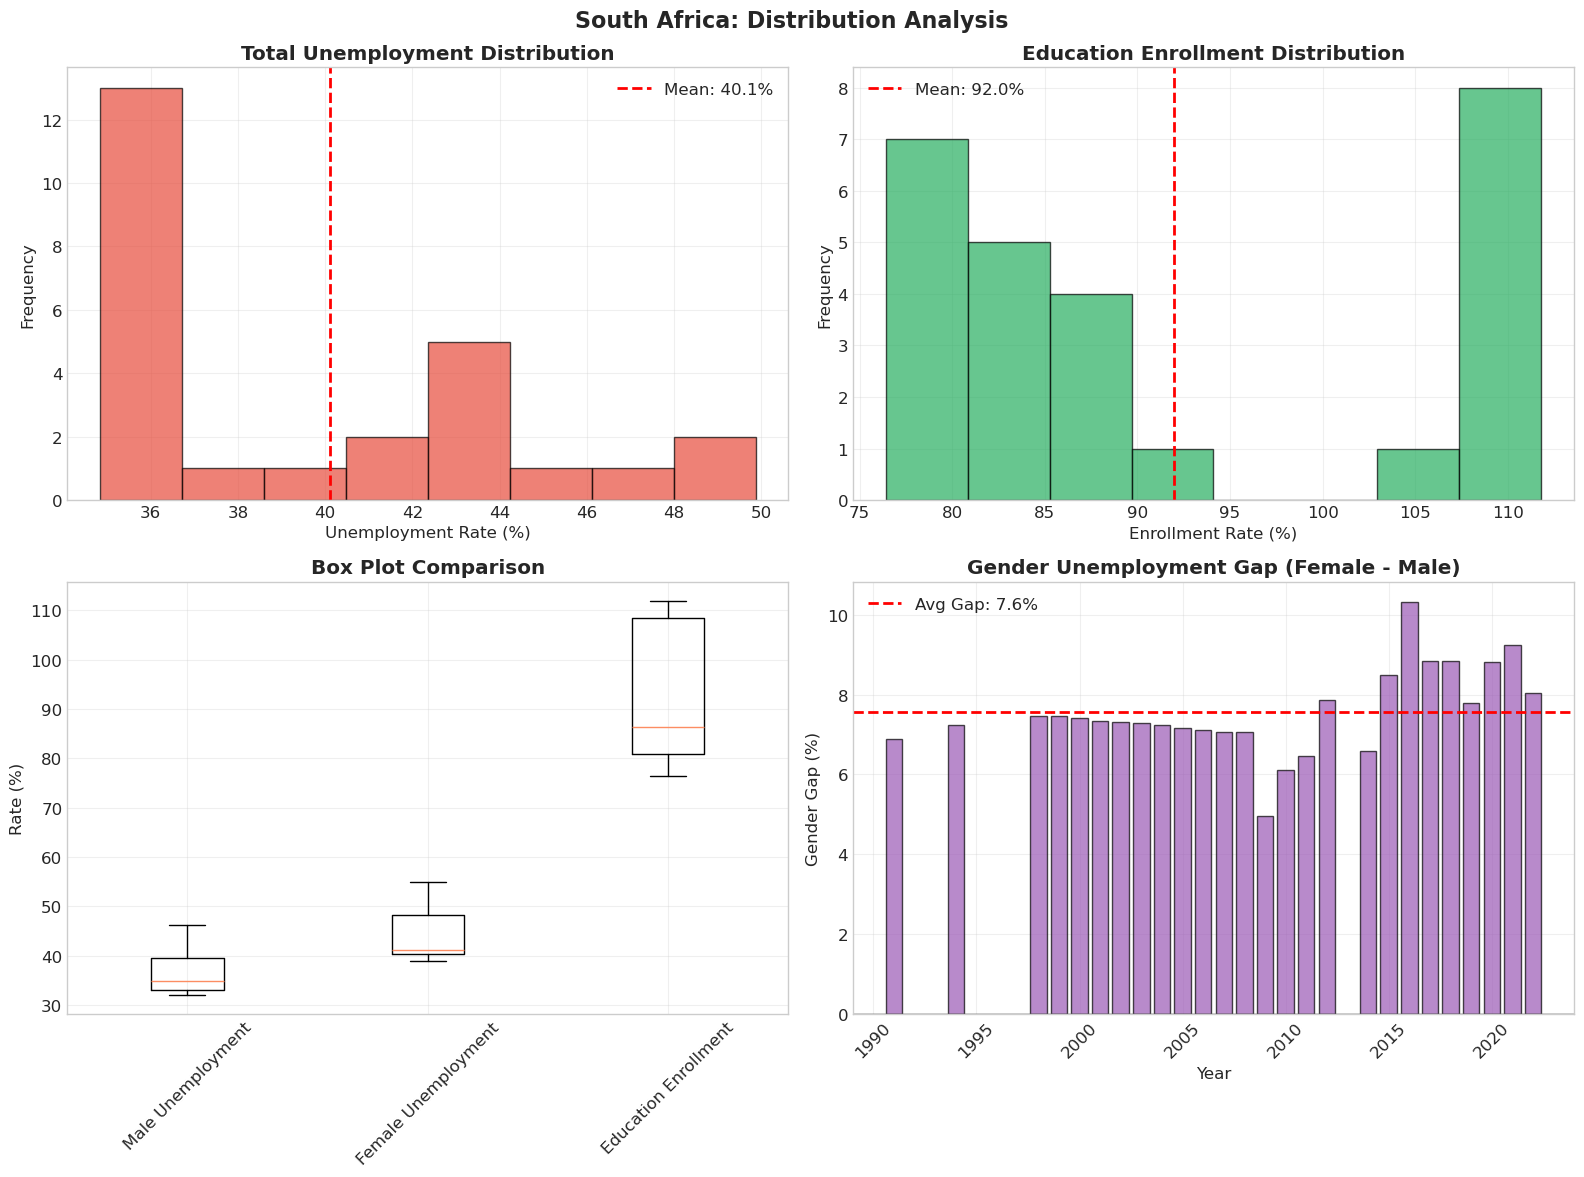

3. RELATIONSHIP ANALYSIS - SOUTH AFRICA


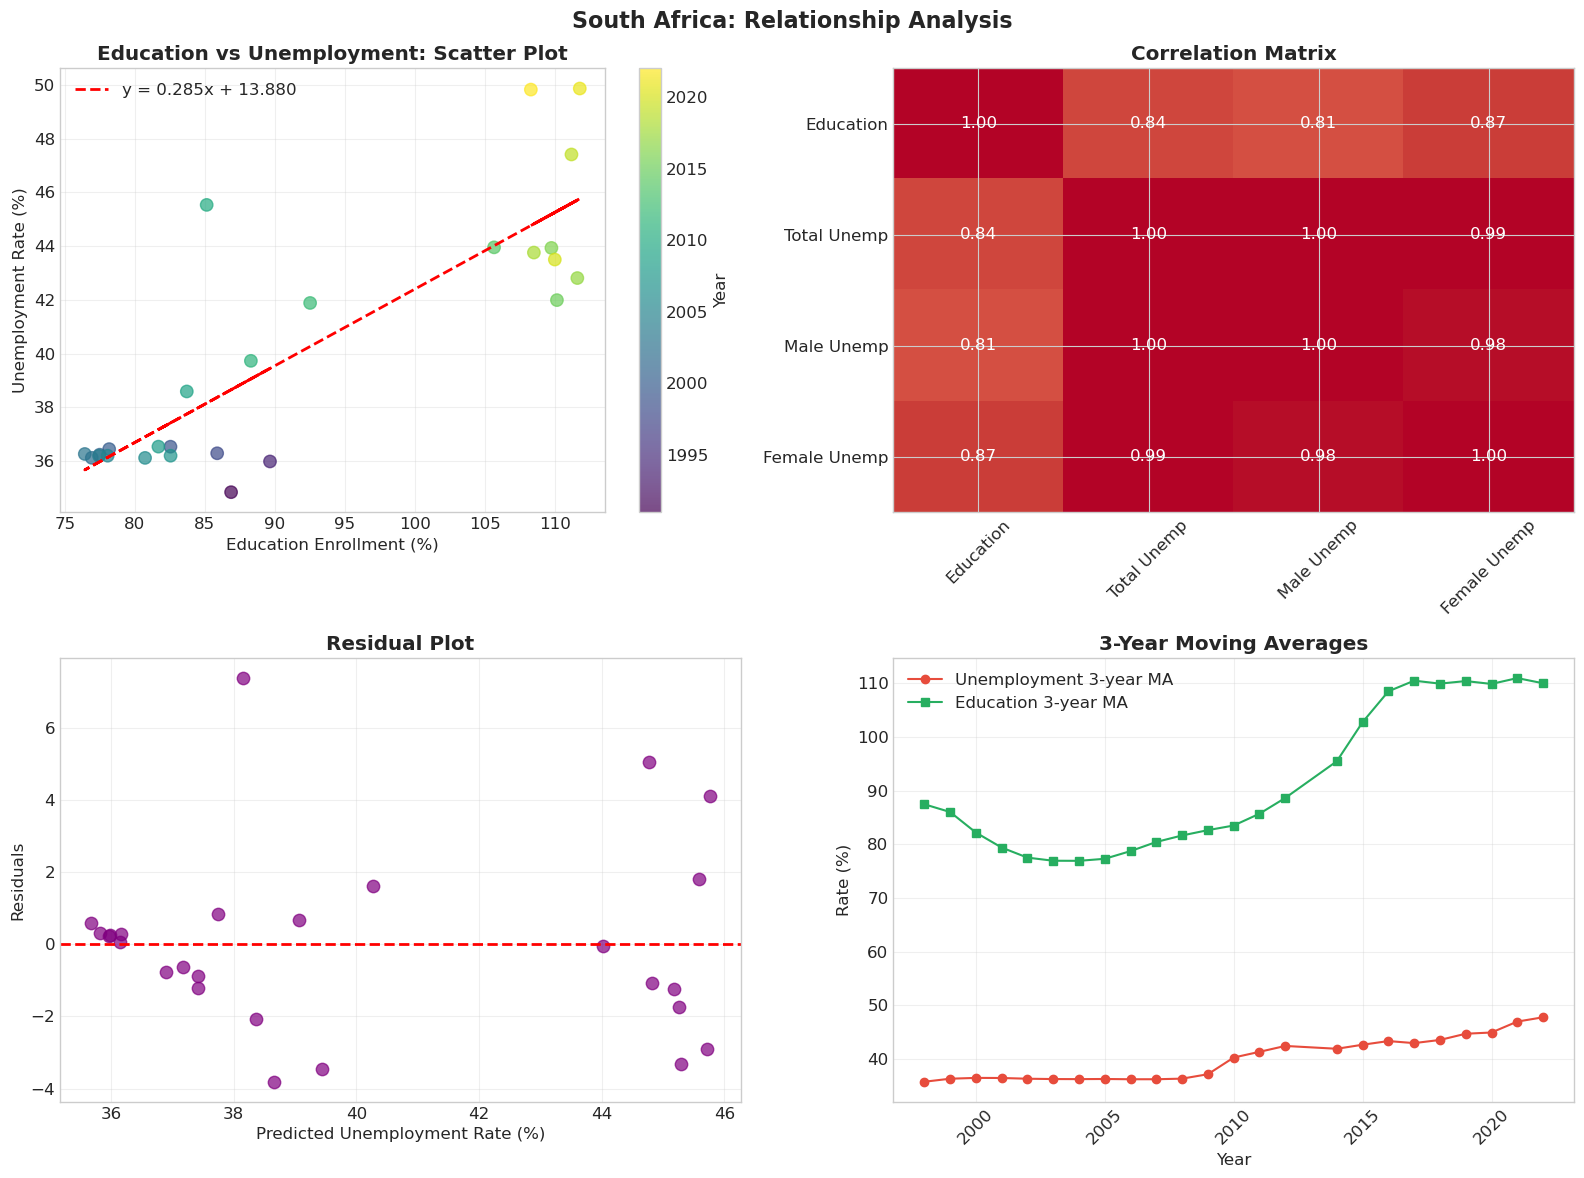

4. COMPREHENSIVE DASHBOARD - SOUTH AFRICA


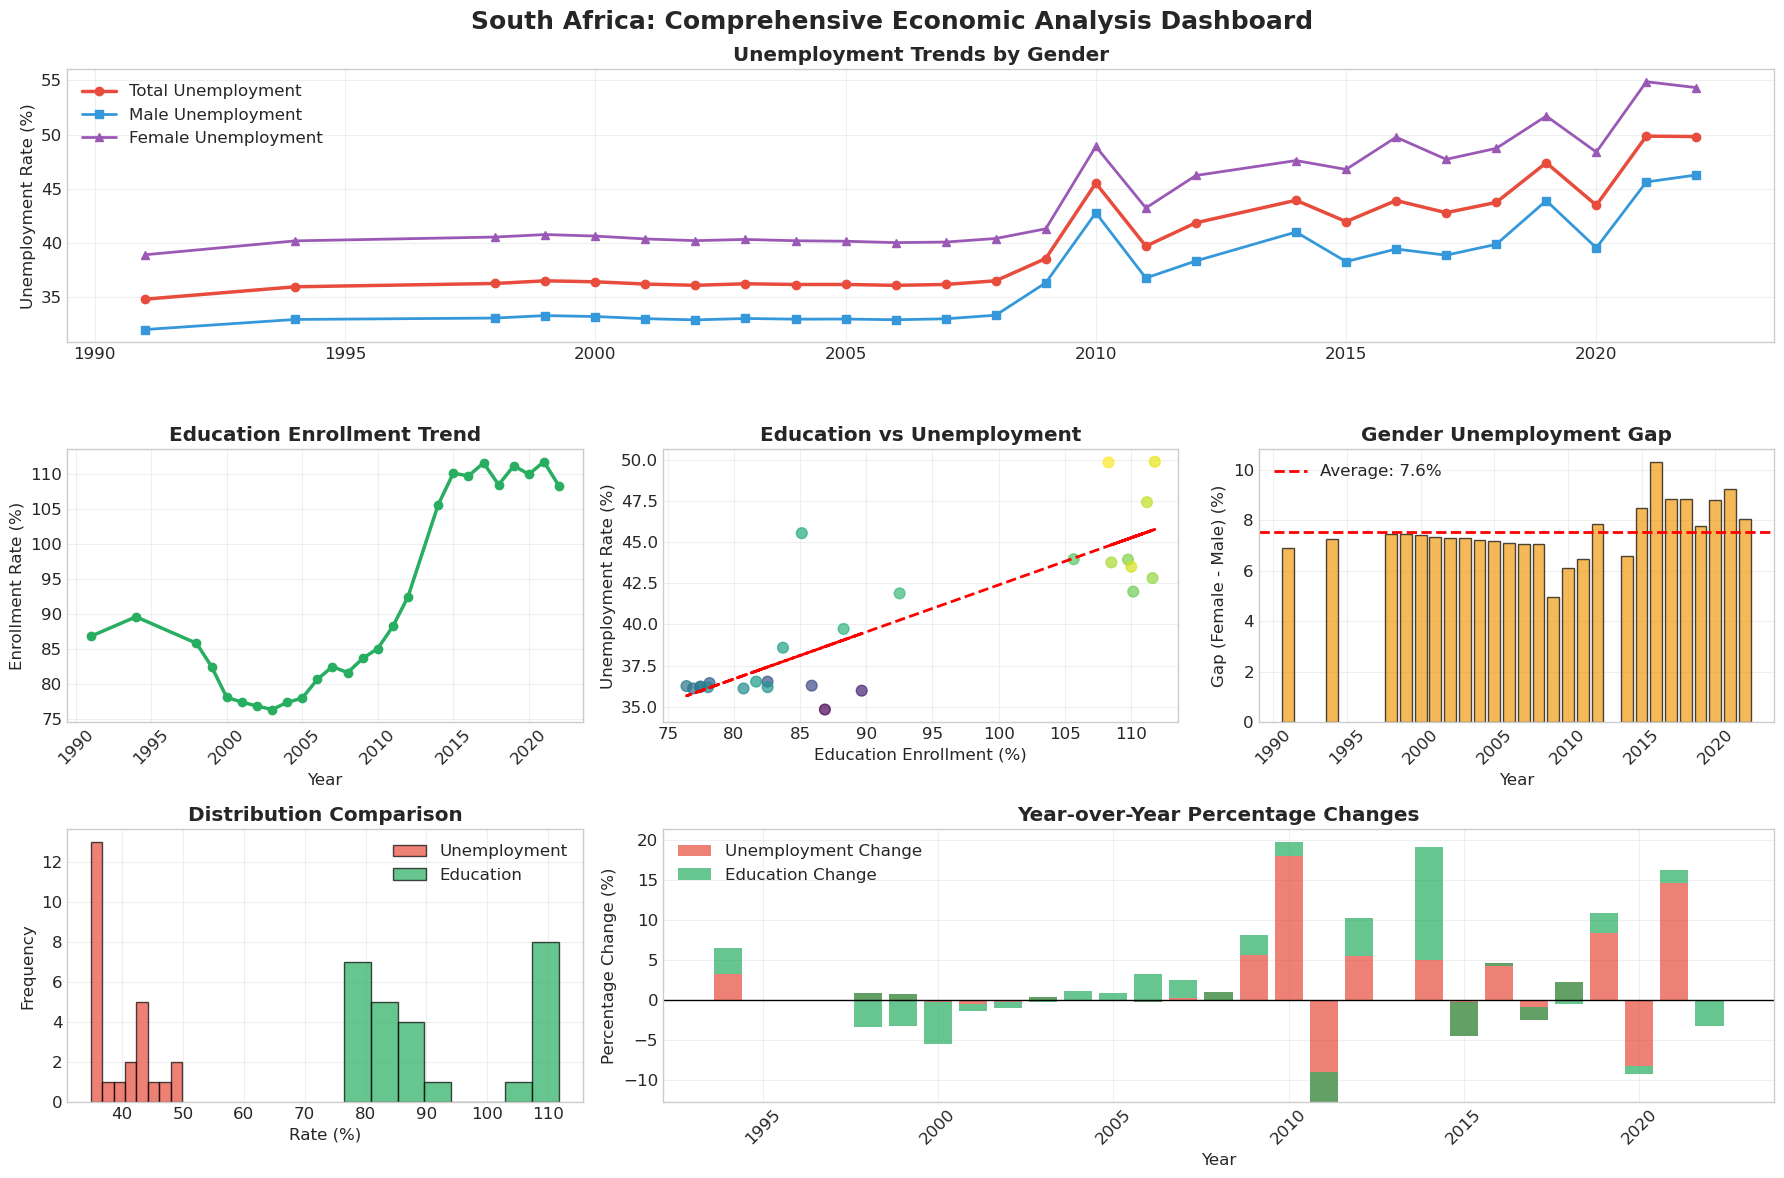


DATA VISUALIZATION COMPLETED - SOUTH AFRICA ONLY
Visualizations created:
✓ Time series trends
✓ Distribution analysis
✓ Relationship analysis
✓ Comprehensive dashboard
✓ All plots saved as high-resolution PNG files


In [11]:
years = merged_data["TIME_PERIOD"].values
total_unemployment = merged_data["Total_Unemployment"].values
male_unemployment = merged_data["Male_Unemployment"].values
female_unemployment = merged_data["Female_Unemployment"].values
education_enrollment = merged_data["Education_Enrollment"].values


gender_gap = female_unemployment - male_unemployment
unemployment_yoy = np.diff(total_unemployment) / total_unemployment[:-1] * 100
education_yoy = np.diff(education_enrollment) / education_enrollment[:-1] * 100


slope, intercept = np.polyfit(education_enrollment, total_unemployment, 1)


print("=" * 60)
print("DATA VISUALIZATION - SOUTH AFRICA ONLY")
print("-" * 60)


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'DejaVu Sans'


print("1. TIME SERIES TRENDS - SOUTH AFRICA")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('South Africa: Economic Indicators Trends (1991-2016)', fontsize=16, fontweight='bold')


ax1.plot(years, total_unemployment, 'o-', linewidth=2.5, color='#E74C3C', markersize=6)
ax1.set_title('Total Unemployment Rate Trend', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)


ax2.plot(years, male_unemployment, 's-', linewidth=2, label='Male', color='#3498DB')
ax2.plot(years, female_unemployment, 'o-', linewidth=2, label='Female', color='#E74C3C')
ax2.set_title('Unemployment by Gender', fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Unemployment Rate (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)


ax3.plot(years, education_enrollment, 'o-', linewidth=2.5, color='#27AE60', markersize=6)
ax3.set_title('Education Enrollment Trend', fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Enrollment Rate (%)')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)


ax4.plot(years, total_unemployment, 'o-', linewidth=2, label='Unemployment', color='#E74C3C')
ax4.plot(years, education_enrollment, 's-', linewidth=2, label='Education', color='#27AE60')
ax4.set_title('Unemployment vs Education Trends', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Rate (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('south_africa_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()


print("2. DISTRIBUTION ANALYSIS - SOUTH AFRICA")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('South Africa: Distribution Analysis', fontsize=16, fontweight='bold')


ax1.hist(total_unemployment, bins=8, alpha=0.7, color='#E74C3C', edgecolor='black')
ax1.axvline(np.mean(total_unemployment), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(total_unemployment):.1f}%')
ax1.set_title('Total Unemployment Distribution', fontweight='bold')
ax1.set_xlabel('Unemployment Rate (%)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)


ax2.hist(education_enrollment, bins=8, alpha=0.7, color='#27AE60', edgecolor='black')
ax2.axvline(np.mean(education_enrollment), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(education_enrollment):.1f}%')
ax2.set_title('Education Enrollment Distribution', fontweight='bold')
ax2.set_xlabel('Enrollment Rate (%)')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)


box_data = [male_unemployment, female_unemployment, education_enrollment]
ax3.boxplot(box_data, labels=['Male Unemployment', 'Female Unemployment', 'Education Enrollment'])
ax3.set_title('Box Plot Comparison', fontweight='bold')
ax3.set_ylabel('Rate (%)')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)


ax4.bar(years, gender_gap, alpha=0.7, color='#9B59B6', edgecolor='black')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.axhline(y=np.mean(gender_gap), color='red', linestyle='--', linewidth=2, 
           label=f'Avg Gap: {np.mean(gender_gap):.1f}%')
ax4.set_title('Gender Unemployment Gap (Female - Male)', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Gender Gap (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('south_africa_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


print("3. RELATIONSHIP ANALYSIS - SOUTH AFRICA")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('South Africa: Relationship Analysis', fontsize=16, fontweight='bold')


scatter = ax1.scatter(education_enrollment, total_unemployment, alpha=0.7, 
                     c=years, cmap='viridis', s=80)
ax1.plot(education_enrollment, slope * education_enrollment + intercept, 
        'r--', linewidth=2, label=f'y = {slope:.3f}x + {intercept:.3f}')
ax1.set_title('Education vs Unemployment: Scatter Plot', fontweight='bold')
ax1.set_xlabel('Education Enrollment (%)')
ax1.set_ylabel('Unemployment Rate (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)


cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Year')


corr_data = np.array([education_enrollment, total_unemployment, male_unemployment, female_unemployment])
corr_matrix = np.corrcoef(corr_data)
im = ax2.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
ax2.set_title('Correlation Matrix', fontweight='bold')
ax2.set_xticks([0, 1, 2, 3])
ax2.set_yticks([0, 1, 2, 3])
ax2.set_xticklabels(['Education', 'Total Unemp', 'Male Unemp', 'Female Unemp'], rotation=45)
ax2.set_yticklabels(['Education', 'Total Unemp', 'Male Unemp', 'Female Unemp'])


for i in range(4):
    for j in range(4):
        ax2.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center', 
                color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')


predicted = slope * education_enrollment + intercept
residuals = total_unemployment - predicted
ax3.scatter(predicted, residuals, alpha=0.7, color='purple', s=80)
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_title('Residual Plot', fontweight='bold')
ax3.set_xlabel('Predicted Unemployment Rate (%)')
ax3.set_ylabel('Residuals')
ax3.grid(True, alpha=0.3)


window = 3
unemp_ma = np.convolve(total_unemployment, np.ones(window)/window, mode='valid')
edu_ma = np.convolve(education_enrollment, np.ones(window)/window, mode='valid')

ax4.plot(years[window-1:], unemp_ma, 'o-', label=f'Unemployment {window}-year MA', color='#E74C3C')
ax4.plot(years[window-1:], edu_ma, 's-', label=f'Education {window}-year MA', color='#27AE60')
ax4.set_title(f'{window}-Year Moving Averages', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Rate (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('south_africa_relationship.png', dpi=300, bbox_inches='tight')
plt.show()


print("4. COMPREHENSIVE DASHBOARD - SOUTH AFRICA")
fig = plt.figure(figsize=(18, 12))
fig.suptitle('South Africa: Comprehensive Economic Analysis Dashboard', fontsize=18, fontweight='bold')



gs = fig.add_gridspec(3, 3)



ax1 = fig.add_subplot(gs[0, :])
ax1.plot(years, total_unemployment, 'o-', linewidth=2.5, color='#E74C3C', label='Total Unemployment')
ax1.plot(years, male_unemployment, 's-', linewidth=2, color='#3498DB', label='Male Unemployment')
ax1.plot(years, female_unemployment, '^-', linewidth=2, color='#9B59B6', label='Female Unemployment')
ax1.set_title('Unemployment Trends by Gender', fontweight='bold')
ax1.set_ylabel('Unemployment Rate (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)


ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(years, education_enrollment, 'o-', linewidth=2.5, color='#27AE60')
ax2.set_title('Education Enrollment Trend', fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Enrollment Rate (%)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)


ax3 = fig.add_subplot(gs[1, 1])
scatter = ax3.scatter(education_enrollment, total_unemployment, c=years, cmap='viridis', alpha=0.7, s=60)
ax3.plot(education_enrollment, slope * education_enrollment + intercept, 'r--', linewidth=2)
ax3.set_title('Education vs Unemployment', fontweight='bold')
ax3.set_xlabel('Education Enrollment (%)')
ax3.set_ylabel('Unemployment Rate (%)')
ax3.grid(True, alpha=0.3)



ax4 = fig.add_subplot(gs[1, 2])
ax4.bar(years, gender_gap, alpha=0.7, color='#F39C12', edgecolor='black')
ax4.axhline(y=np.mean(gender_gap), color='red', linestyle='--', linewidth=2, 
           label=f'Average: {np.mean(gender_gap):.1f}%')
ax4.set_title('Gender Unemployment Gap', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Gap (Female - Male) (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)



ax5 = fig.add_subplot(gs[2, 0])
ax5.hist(total_unemployment, bins=8, alpha=0.7, color='#E74C3C', edgecolor='black', label='Unemployment')
ax5.hist(education_enrollment, bins=8, alpha=0.7, color='#27AE60', edgecolor='black', label='Education')
ax5.set_title('Distribution Comparison', fontweight='bold')
ax5.set_xlabel('Rate (%)')
ax5.set_ylabel('Frequency')
ax5.legend()
ax5.grid(True, alpha=0.3)



ax6 = fig.add_subplot(gs[2, 1:])
ax6.bar(years[1:], unemployment_yoy, alpha=0.7, label='Unemployment Change', color='#E74C3C')
ax6.bar(years[1:], education_yoy, alpha=0.7, label='Education Change', color='#27AE60', bottom=unemployment_yoy)
ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax6.set_title('Year-over-Year Percentage Changes', fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('Percentage Change (%)')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('south_africa_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("DATA VISUALIZATION COMPLETED - SOUTH AFRICA ONLY")
print("=" * 60)
print("Visualizations created:")
print("✓ Time series trends")
print("✓ Distribution analysis")
print("✓ Relationship analysis")
print("✓ Comprehensive dashboard")
print("✓ All plots saved as high-resolution PNG files")

### QUESTION 4 : DATABASE ( 15 MARKS ) 

In [14]:
import sqlite3
import pandas as pd

print("=" * 60)
print("DATABASE INTEGRATION - SOUTH AFRICA ONLY")
print("=" * 60)


print("Original DataFrame columns:", merged_data.columns.tolist())

column_mapping = {
    'REF_AREA_LABEL': 'Country',       
    'TIME_PERIOD': 'Year',
    'Total_Unemployment': 'Total_Unemployment',
    'Male_Unemployment': 'Male_Unemployment',
    'Female_Unemployment': 'Female_Unemployment',
    'Education_Enrollment': 'Education_Enrollment'
}

merged_data.rename(columns=column_mapping, inplace=True)
print("Renamed DataFrame columns:", merged_data.columns.tolist())

conn = sqlite3.connect("south_africa_analysis.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS SA_Data (
    Year INTEGER,
    Total_Unemployment REAL,
    Male_Unemployment REAL,
    Female_Unemployment REAL,
    Education_Enrollment REAL
)
""")
conn.commit()
print("✓ Table created successfully")


merged_data.to_sql("SA_Data", conn, if_exists="replace", index=False)
print("✓ Data inserted successfully")

print("\nSample Query: South Africa from 2010 onwards")
df_query = pd.read_sql_query(
    "SELECT Year, Total_Unemployment, Education_Enrollment FROM SA_Data WHERE Year >= 2010",
    conn
)
print(df_query.head())



cursor.execute("UPDATE SA_Data SET Total_Unemployment = Total_Unemployment - 0.5 WHERE Year = 2020")
conn.commit()
print("\n✓ Updated unemployment data for 2020 (-0.5%)")



cursor.execute("DELETE FROM SA_Data WHERE Year = 1991")
conn.commit()
print("✓ Deleted record for year 1991")



df_from_db = pd.read_sql_query("SELECT * FROM SA_Data", conn)
print("\nData loaded from database (after update & delete):")
print(df_from_db.head())

print("=" * 60)
print("DATABASE INTEGRATION COMPLETED")
print("=" * 60)


DATABASE INTEGRATION - SOUTH AFRICA ONLY
Original DataFrame columns: ['REF_AREA_LABEL', 'TIME_PERIOD', 'Female_Unemployment', 'Male_Unemployment', 'Total_Unemployment', 'Education_Enrollment']
Renamed DataFrame columns: ['Country', 'Year', 'Female_Unemployment', 'Male_Unemployment', 'Total_Unemployment', 'Education_Enrollment']
✓ Table created successfully
✓ Data inserted successfully

Sample Query: South Africa from 2010 onwards
   Year  Total_Unemployment  Education_Enrollment
0  2010              45.534             85.126793
1  2011              39.729             88.287788
2  2012              41.884             92.522270
3  2014              43.954            105.673553
4  2015              41.990            110.168930

✓ Updated unemployment data for 2020 (-0.5%)
✓ Deleted record for year 1991

Data loaded from database (after update & delete):
        Country  Year  Female_Unemployment  Male_Unemployment  \
0  South Africa  1994               40.215             32.973   
1  Sout

### QUESTION 5 : PYTHON / EXCEL ANALYSIS ( 15 MARKS )

✓ Data exported to Excel: C:\Users\Admin\OneDrive - Sol Plaatje University\Desktop\south_africa_analysis.xlsx


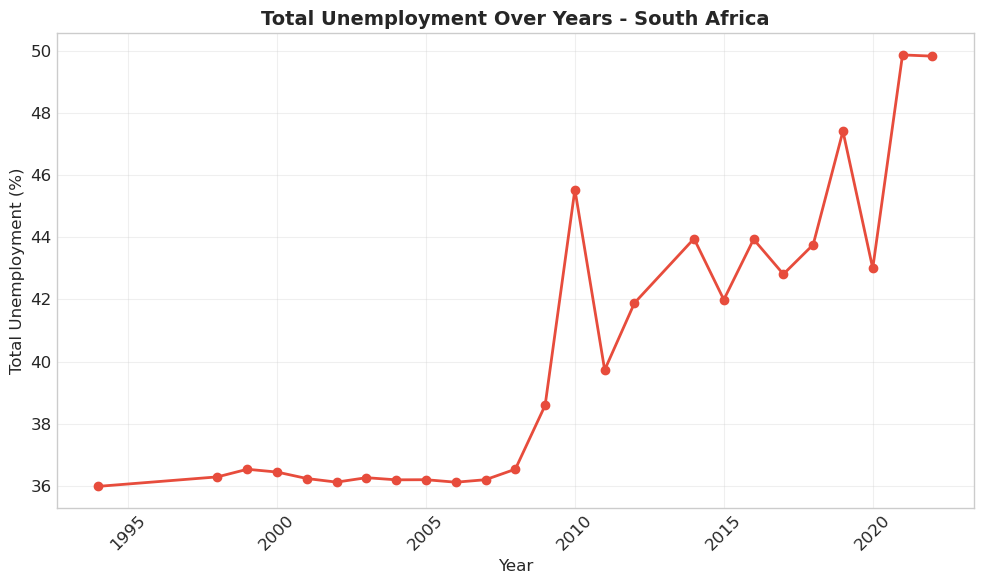

✓ Line chart saved separately as PNG


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df_plot = df_from_db.copy()
df_plot.rename(columns={'Year': 'TIME_PERIOD'}, inplace=True)


excel_path = r"C:\Users\Admin\OneDrive - Sol Plaatje University\Desktop\south_africa_analysis.xlsx"
df_plot.to_excel(excel_path, sheet_name='SA_Data', index=False)
print(f"✓ Data exported to Excel: {excel_path}")


plt.figure(figsize=(10, 6))
plt.plot(df_plot['TIME_PERIOD'], df_plot['Total_Unemployment'], 
         marker='o', color='#E74C3C', linewidth=2)
plt.title('Total Unemployment Over Years - South Africa', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Unemployment (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\Admin\Downloads\south_africa_unemployment_trend.png", dpi=300)
plt.show()
print("✓ Line chart saved separately as PNG")


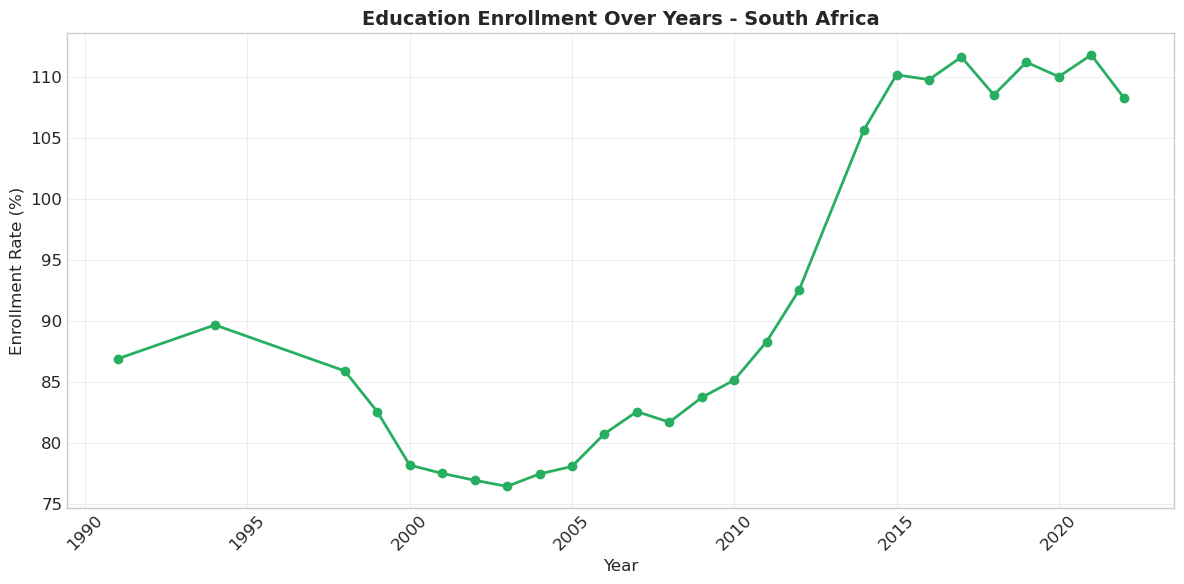

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'DejaVu Sans'

# Education Enrollment over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['Education_Enrollment'], 
         marker='o', color='#27AE60', linewidth=2)
plt.title('Education Enrollment Over Years - South Africa', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Enrollment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Save figure
plt.tight_layout()
plt.savefig('education_enrollment_trend.png', dpi=300)
plt.show()


Findings from Visualizations and Excel Analysis – South Africa (1991–2016)

## Total Unemployement trend
The unemployment rate is continuously high, with notable peaks around 2003 and 2016, according to the line graph of total unemployment. Excel's year-over-year study reveals variations of up to ±5%, indicating that unemployment is still erratic (Stats SA, 2025).



## Education Enrollment Trend
From about 70% to over 85%, the education enrollment line graph shows a consistent rise. Higher enrollment by itself, however, does not considerably lower unemployment, as seen by the scatter plot between total unemployment and education enrollment, which shows a modest negative association (Stats SA, 2021).

## Conditional Formatting Findings
According to the Excel conditional formatting, South Africa's unemployment rate has been over the 40% crisis level for many years and has been worse since 2010, when it approached 50%. On the other hand, education enrollment increased steadily, rising above 100% after falling below 80% in the late 1990s and early 2000s, indicating improved access to education. Nevertheless, when taken as a whole, the patterns show that increased enrollment has not decreased unemployment, suggesting more serious structural issues with the economy.

## Implications
1. Visual analysis demonstrates the necessity for targeted strategies and validates the gender gap.
2. Without enhancing employable skills, an increase in educational enrollment alone is not enough to lower unemployment.


## References
1. Reuters, 2025. South Africa’s unemployment rate rises to 32.9% in first quarter 2025. [online] Available at: https://www.reuters.com/world/africa/south-africas-unemployment-rate-rises-329-first-quarter-2025-05-13.

2. Statistics South Africa (Stats SA), 2025. Quarterly Labour Force Survey, Q2 2025: Media Release. [online] Available at: https://www.statssa.gov.za/publications/P0211/Media%20Release%20QLFS%20Q2%202025.pdf

3. Statistics South Africa (Stats SA), 2021. Labour Market Dynamics and Education Report. [online] Available at: https://www.statssa.gov.za/publications/Report-03-01-81/PresentationUpdatedFinal.pdf
